In [1]:
from __future__ import print_function, division
import sys,os
# line 4 and line 5 below are for development purposes and can be removed
qspin_path = os.path.join(os.getcwd(),"../../")
sys.path.insert(0,qspin_path)
from scipy.linalg import expm
from quspin.operators import hamiltonian, commutator, exp_op # Hamiltonians and operators
from quspin.basis import tensor_basis, spin_basis_1d # bases
from quspin.tools.measurements import obs_vs_time # calculating dynamics
from quspin.tools.Floquet import Floquet_t_vec # period-spaced time vector
import numpy as np # general math functions
import matplotlib.pyplot as plt # plotting library

In [74]:
L = 5
M = 0.1
l=1
no_checks = dict(check_pcon=False,check_symm=False,check_herm=False)


In [75]:
basis=spin_basis_1d(L=L,S = str(l))
print(basis)

reference states: 
array index   /   Fock state   /   integer repr. 
       0.         |2 2 2 2 2>           242  
       1.         |2 2 2 2 1>           241  
       2.         |2 2 2 2 0>           240  
       3.         |2 2 2 1 2>           239  
       4.         |2 2 2 1 1>           238  
       5.         |2 2 2 1 0>           237  
       6.         |2 2 2 0 2>           236  
       7.         |2 2 2 0 1>           235  
       8.         |2 2 2 0 0>           234  
       9.         |2 2 1 2 2>           233  
      10.         |2 2 1 2 1>           232  
      11.         |2 2 1 2 0>           231  
      12.         |2 2 1 1 2>           230  
      13.         |2 2 1 1 1>           229  
      14.         |2 2 1 1 0>           228  
      15.         |2 2 1 0 2>           227  
      16.         |2 2 1 0 1>           226  
      17.         |2 2 1 0 0>           225  
      18.         |2 2 0 2 2>           224  
      19.         |2 2 0 2 1>           223  
      20.  

In [76]:
basis_vectors = []
for index in range(basis.Ns):
    state = np.zeros(basis.Ns)
    state[basis.Ns-index-1] = 1.
    state = state.tolist()
    basis_vectors.append(state)

In [77]:
#Gauss_law_0

gauss_law_z_0 = []
gauss_law_z_0.append([1.,0])

gauss_law_0_map = [
    
    ["z",gauss_law_z_0]

    
]

Gauss_law_0  = hamiltonian(gauss_law_0_map,dynamic_list=[],basis=basis,**no_checks)

constraint_0 = Gauss_law_0**2-Gauss_law_0

In [78]:
Proj_10 = 0
Proj_00 = 0
for state in basis_vectors:
    state = np.array(state)
    if (Gauss_law_0.expt_value(state)>=1.-1e-8) & (Gauss_law_0.expt_value(state)<=1.+1e-8):
        Proj_10 += np.outer(state,state)
    if (Gauss_law_0.expt_value(state)>=0.-1e-8) & (Gauss_law_0.expt_value(state)<=0.+1e-8):
        Proj_00 += np.outer(state,state)

In [79]:
#Gauss_law_1
gauss_law_zm_1 = []
gauss_law_zm_1.append([-1.,0])

gauss_law_z_1 = []
gauss_law_z_1.append([1.,1])

gauss_law_id_1 = [[1.,1]]

gauss_law_1_map = [
    
    ["z",gauss_law_z_1],
    ["z",gauss_law_zm_1],
    ["I",gauss_law_id_1]
    
]

Gauss_law_1  = hamiltonian(gauss_law_1_map,dynamic_list=[],basis=basis,**no_checks)
constraint_1 = Gauss_law_1**2-Gauss_law_1

In [80]:
Proj_01 = 0
Proj_11 = 0
for state in basis_vectors:
    state = np.array(state)
    if (Gauss_law_1.expt_value(state)>=0.-1e-8) & (Gauss_law_1.expt_value(state)<=0.+1e-8):
        Proj_01 += np.outer(state,state)
    if (Gauss_law_1.expt_value(state)>=1.-1e-8) & (Gauss_law_1.expt_value(state)<=1.+1e-8):
        Proj_11 += np.outer(state,state)

In [81]:
#Gauss_law_2
gauss_law_zm_2 = []
gauss_law_zm_2.append([-1.,1])

gauss_law_z_2 = []
gauss_law_z_2.append([1.,2])


gauss_law_2_map = [
    
    ["z",gauss_law_z_2],
    ["z",gauss_law_zm_2],
    
]

Gauss_law_2  = hamiltonian(gauss_law_2_map,dynamic_list=[],basis=basis,**no_checks)
constraint_2 = Gauss_law_2**2-Gauss_law_2

In [82]:
Proj_02 = 0
Proj_12 = 0
for state in basis_vectors:
    state = np.array(state)
    if (Gauss_law_2.expt_value(state)>=0.-1e-8) & (Gauss_law_2.expt_value(state)<=0.+1e-8):
        Proj_02 += np.outer(state,state)
    if (Gauss_law_2.expt_value(state)>=1.-1e-8) & (Gauss_law_2.expt_value(state)<=1.+1e-8):
        Proj_12 += np.outer(state,state)

In [83]:
#Gauss_law_3
gauss_law_zm_3 = []
gauss_law_zm_3.append([-1.,2])

gauss_law_z_3 = []
gauss_law_z_3.append([1.,3])

gauss_law_id_3 = [[1.,3]]

gauss_law_3_map = [
    
    ["z",gauss_law_z_3],
    ["z",gauss_law_zm_3],
    ["I",gauss_law_id_3]
    
]

Gauss_law_3  = hamiltonian(gauss_law_3_map,dynamic_list=[],basis=basis,**no_checks)
constraint_3 = Gauss_law_3**2-Gauss_law_3

In [84]:
Proj_03 = 0
Proj_13 = 0

for state in basis_vectors:
    state = np.array(state)
    if (Gauss_law_3.expt_value(state)>=0.-1e-8) & (Gauss_law_3.expt_value(state)<=0.+1e-8):
        Proj_03 += np.outer(state,state)
    if (Gauss_law_3.expt_value(state)>=1.-1e-8) & (Gauss_law_3.expt_value(state)<=1.+1e-8):
        Proj_13 += np.outer(state,state)

In [85]:
#Gauss_law_4
gauss_law_zm_4 = []
gauss_law_zm_4.append([-1.,3])

gauss_law_z_4 = []
gauss_law_z_4.append([1.,4])


gauss_law_4_map = [
    
    ["z",gauss_law_z_4],
    ["z",gauss_law_zm_4],
    
]

Gauss_law_4  = hamiltonian(gauss_law_4_map,dynamic_list=[],basis=basis,**no_checks)
constraint_4 = Gauss_law_4**2-Gauss_law_4

In [86]:
Proj_04 = 0
Proj_14 = 0

for state in basis_vectors:
    state = np.array(state)
    if (Gauss_law_4.expt_value(state)>=0.-1e-8) & (Gauss_law_4.expt_value(state)<=0.+1e-8):
        Proj_04 += np.outer(state,state)
    if (Gauss_law_4.expt_value(state)>=1.-1e-8) & (Gauss_law_4.expt_value(state)<=1.+1e-8):
        Proj_14 += np.outer(state,state)

In [87]:
#Gauss_law_1
gauss_law_zm_5 = []
gauss_law_zm_5.append([-1.,4])



gauss_law_id_5 = [[1.,4]]

gauss_law_5_map = [
    
    ["z",gauss_law_zm_5],
    ["I",gauss_law_id_5]
    
]

Gauss_law_5  = hamiltonian(gauss_law_5_map,dynamic_list=[],basis=basis,**no_checks)
constraint_5 = Gauss_law_5**2-Gauss_law_5

In [88]:
Proj_05 = 0
Proj_15 = 0

for state in basis_vectors:
    state = np.array(state)
    if (Gauss_law_5.expt_value(state)>=0.-1e-8) & (Gauss_law_5.expt_value(state)<=0.+1e-8):
        Proj_05 += np.outer(state,state)
    if (Gauss_law_5.expt_value(state)>=1.-1e-8) & (Gauss_law_5.expt_value(state)<=1.+1e-8):
        Proj_15 += np.outer(state,state)

In [131]:
e=1.
linear_term_0 = [[-e/(2*np.sqrt(2)),0]]


quadratic_term_1 = [[e/(2*np.sqrt(2)),1,2]]
linear_term_1 = [[e/(2*np.sqrt(2)),1]]

linear_term_2 = [[-e/(2*np.sqrt(2)),2]]

quadratic_term_3 = [[e/(2*np.sqrt(2)),3,4]]
linear_term_3 = [[e/(2*np.sqrt(2)),3]]

linear_term_4 = [[-e/(2*np.sqrt(2)),4]]


kin_energy = [[0.5,i,i] for i in range(L)]
mass_term = [[(-1)**i*2*M,i]for i in range(L)]


kin_mass_map = [
            ["zz", kin_energy], 
            ["z", mass_term], 
]


interaction_map_p0 = [
    
    ["+", linear_term_0]
]

interaction_map_m0 = [
    
    ["-", linear_term_0]
]




interaction_map_p1 = [
    
    ["+z", quadratic_term_1],
    ["+", linear_term_1]
]

interaction_map_m1 = [
    
    ["-z", quadratic_term_1],
    ["-", linear_term_1]
]



interaction_map_p2 = [
    
    ["+", linear_term_2]
]

interaction_map_m2 = [
    
    ["-", linear_term_2]
]

interaction_map_p3 = [
    
    ["+z", quadratic_term_3],
    ["+", linear_term_3]
]

interaction_map_m3 = [
    
    ["-z", quadratic_term_3],
    ["-", linear_term_3]
]

interaction_map_p4 = [
    
    ["+", linear_term_4]
]

interaction_map_m4 = [
    
    ["-", linear_term_4]
]






H_int_p0 = hamiltonian(interaction_map_p0,dynamic_list=[],basis=basis,**no_checks)
H_int_m0 = hamiltonian(interaction_map_m0,dynamic_list=[],basis=basis,**no_checks)

H_int_p1 = hamiltonian(interaction_map_p1,dynamic_list=[],basis=basis,**no_checks)
H_int_m1 = hamiltonian(interaction_map_m1,dynamic_list=[],basis=basis,**no_checks)

H_int_p2 = hamiltonian(interaction_map_p2,dynamic_list=[],basis=basis,**no_checks)
H_int_m2 = hamiltonian(interaction_map_m2,dynamic_list=[],basis=basis,**no_checks)

H_int_p3 = hamiltonian(interaction_map_p3,dynamic_list=[],basis=basis,**no_checks)
H_int_m3 = hamiltonian(interaction_map_m3,dynamic_list=[],basis=basis,**no_checks)

H_int_p4 = hamiltonian(interaction_map_p4,dynamic_list=[],basis=basis,**no_checks)
H_int_m4 = hamiltonian(interaction_map_m4,dynamic_list=[],basis=basis,**no_checks)

H_kin_mass = hamiltonian(kin_mass_map,dynamic_list=[],basis=basis,**no_checks)

h_int_p0 = H_int_p0.toarray()
h_int_m0 = H_int_m0.toarray()

h_int_p1 = H_int_p1.toarray()
h_int_m1 = H_int_m1.toarray()

h_int_p2 = H_int_p2.toarray()
h_int_m2 = H_int_m2.toarray()

h_int_p3 = H_int_p3.toarray()
h_int_m3 = H_int_m3.toarray()

h_int_p4 = H_int_p4.toarray()
h_int_m4 = H_int_m4.toarray()

h_kin_mass = H_kin_mass.toarray()

h_int_0 = Proj_10 @ h_int_p0 @ Proj_01 + Proj_01 @ h_int_m0 @ Proj_10
h_int_1 = Proj_11 @ h_int_p1 @ Proj_02 + Proj_02 @ h_int_m1 @ Proj_11
h_int_2 = Proj_12 @ h_int_p2 @ Proj_03 + Proj_03 @ h_int_m2 @ Proj_12
h_int_3 = Proj_13 @ h_int_p3 @ Proj_04 + Proj_04 @ h_int_m3 @ Proj_13
h_int_4 = Proj_14 @ h_int_p4 @ Proj_05 + Proj_05 @ h_int_m4 @ Proj_14

h_int = h_int_0+h_int_1+h_int_2+h_int_3+h_int_4

full_ham_matrix = h_kin_mass + h_int
constraint_full = 1e3*(constraint_0**2+constraint_1**2+constraint_2**2+constraint_3**2+constraint_3**2+constraint_4**2+constraint_5**2)
constraint_full_matrix = constraint_full.toarray()

restricted_full_ham_matrix = full_ham_matrix+constraint_full_matrix
print(h_int)

[[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]]


In [132]:
for i in range(basis.Ns):
    for j in range(basis.Ns):
        if (h_int[i][j]<=-1e-5) | (h_int[i][j]>=1e-5):
            print((h_int[i][j],i,j))

((0.5+0j), 1, 4)
((0.5+0j), 4, 1)
((0.5+0j), 9, 36)
((0.5+0j), 10, 37)
((0.5+0j), 11, 38)
((0.5+0j), 12, 39)
((0.5+0j), 13, 40)
((0.5+0j), 14, 41)
((0.5+0j), 15, 42)
((0.5+0j), 16, 43)
((0.5+0j), 17, 44)
((0.5+0j), 28, 31)
((0.5+0j), 31, 28)
((-0.5+0j), 33, 42)
((-0.5+0j), 34, 43)
((-0.5+0j), 35, 44)
((0.5+0j), 36, 9)
((0.5+0j), 37, 10)
((0.5+0j), 38, 11)
((0.5+0j), 39, 12)
((0.5+0j), 40, 13)
((0.5+0j), 41, 14)
((0.5+0j), 42, 15)
((-0.5+0j), 42, 33)
((0.5+0j), 43, 16)
((-0.5+0j), 43, 34)
((0.5+0j), 44, 17)
((-0.5+0j), 44, 35)
((-0.5+0j), 54, 135)
((0.5+0j), 55, 58)
((-0.5+0j), 55, 136)
((-0.5+0j), 56, 137)
((-0.5+0j), 57, 138)
((0.5+0j), 58, 55)
((-0.5+0j), 58, 139)
((-0.5+0j), 59, 140)
((-0.5+0j), 60, 141)
((-0.5+0j), 61, 142)
((-0.5+0j), 62, 143)
((-0.5+0j), 63, 144)
((-0.5+0j), 64, 145)
((-0.5+0j), 65, 146)
((-0.5+0j), 66, 147)
((-0.5+0j), 67, 148)
((-0.5+0j), 68, 149)
((-0.5+0j), 69, 150)
((-0.5+0j), 70, 151)
((-0.5+0j), 71, 152)
((-0.5+0j), 72, 153)
((-0.5+0j), 73, 154)
((-0.5+0j)

In [133]:
def check_hermitian(a, rtol=1e-10, atol=1e-10):
    return np.allclose(a, a.conj().T, rtol=rtol, atol=atol)

In [134]:
print(check_hermitian(restricted_full_ham_matrix))

True


In [135]:
eigenval,eigenvec = np.linalg.eigh(restricted_full_ham_matrix)

In [136]:
print(eigenval)

[2.54897356e-11 6.99937505e-01 6.99937505e-01 6.99937511e-01
 6.99968753e-01 7.00000000e-01 1.39990626e+00 1.39993750e+00
 1.39993750e+00 1.39993751e+00 1.39993751e+00 1.40000000e+00
 1.69993750e+00 1.69993751e+00 1.70000000e+00 2.10000000e+00
 2.40000000e+00 2.40000000e+00 2.70000000e+00 4.00099994e+03
 4.00099997e+03 4.00100000e+03 4.00100000e+03 4.00100006e+03
 4.00100006e+03 4.00139988e+03 4.00139997e+03 4.00140006e+03
 4.00169991e+03 4.00169994e+03 4.00170000e+03 4.00170000e+03
 4.00170000e+03 4.00170000e+03 4.00170006e+03 4.00170006e+03
 4.00170006e+03 4.00199994e+03 4.00200000e+03 4.00200000e+03
 4.00200006e+03 4.00209991e+03 4.00209994e+03 4.00209994e+03
 4.00210006e+03 4.00210006e+03 4.00239994e+03 4.00239994e+03
 4.00240006e+03 8.00030000e+03 8.00030000e+03 8.00030000e+03
 8.00099994e+03 8.00099994e+03 8.00099994e+03 8.00099994e+03
 8.00099997e+03 8.00100000e+03 8.00100000e+03 8.00100000e+03
 8.00100000e+03 8.00100000e+03 8.00130000e+03 8.00130006e+03
 8.00140003e+03 8.001699

In [137]:
print(eigenvec[:,0])

[ 0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  0.

In [138]:
expt_value = 0
psi_0 = eigenvec[:,0]
matvec_h = full_ham_matrix@psi_0
matvec_c = constraint_full_matrix@psi_0
for i in range(basis.Ns):
    expt_value += np.conj(psi_0[i])*(matvec_h[i]+matvec_c[i])
print(np.real(expt_value))

2.878296425723346e-24


In [140]:
mixing_term = [[0.5,i,i+1] for i in range(L-1)]
mixing_z = [[1.,i] for i in range(L)]
mixing_map = [
    #["++",mixing_term],
    #["--",mixing_term],
    #["+-",mixing_term],
    #["-+",mixing_term],
    ["+",mixing_z],
    ["-",mixing_z],
]
mixing_map_zz = [
    ["zz",mixing_term]
]
Ham_mix = hamiltonian(mixing_map,dynamic_list=[],basis=basis,**no_checks)
Ham_mix_zz = hamiltonian(mixing_map_zz,dynamic_list=[],basis=basis,**no_checks)

In [141]:
resource_z = [[1.,i] for i in range(L)]
resource_zz = [[1.,i,i] for i in range(L-1)]
resource_x = [[0.5,i] for i in range(L-1)]
resource_z2 = [[1.,2]]

resource_map_zz = [
    
    ["zz", resource_zz],
]

resource_map_z = [
    ["z", resource_z],
]

resource_map_x = [
    ["+", resource_x],
    ["-", resource_x],

]

resource_map_z2 = [
    ["z", resource_z2],

]

Ham_res_zz = hamiltonian(resource_map_zz,dynamic_list=[],basis=basis,**no_checks)
Ham_res_z = hamiltonian(resource_map_z,dynamic_list=[],basis=basis,**no_checks)
Ham_res_x = hamiltonian(resource_map_x,dynamic_list=[],basis=basis,**no_checks)
Ham_res_z2 = hamiltonian(resource_map_z2,dynamic_list=[],basis=basis,**no_checks)


In [142]:
print(check_hermitian(Ham_res_x.toarray()))

True


In [143]:
Ham_res = Ham_res_zz+Ham_res_z+Ham_res_x

In [144]:
eigenval_mix, eigenvec_mix = Ham_res.eigh()

In [145]:
#psi_0 = np.zeros(basis.Ns)
#i_0 = basis.index("111")
#psi_0[i_0] = 1.
psi_0 = eigenvec_mix[:,0]

In [146]:
expt_value = 0
matvec_h = full_ham_matrix@psi_0
matvec_c = constraint_full_matrix@psi_0
for i in range(basis.Ns):
    expt_value += np.conj(psi_0[i])*(matvec_h[i]+matvec_c[i])
print(np.real(expt_value))

15415.527070791491


In [147]:
expt_value = 0
matvec = full_ham_matrix@psi_0
for i in range(basis.Ns):
    expt_value += np.conj(psi_0[i])*matvec[i]
print(expt_value)

(1.3004736599297422+0j)


In [148]:
def cost_function(theta,psi,a):

    psi_1 = Ham_mix.evolve(psi,0.0,theta[0])
    psi_2 = Ham_mix_zz.evolve(psi_1,0.0,theta[1])
    psi_3 = Ham_res_zz.evolve(psi_2,0.0,theta[2])
    psi_4 = Ham_res_x.evolve(psi_3,0.0,theta[3])
    psi_5 = Ham_res_z.evolve(psi_4,0.0,theta[4])
    psi_6 = Ham_mix.evolve(psi_5,0.0,theta[5])
    psi_7 = Ham_mix_zz.evolve(psi_6,0.0,theta[6])
    psi_8 = Ham_res_zz.evolve(psi_7,0.0,theta[7])
    psi_9 = Ham_res_x.evolve(psi_8,0.0,theta[8])
    psi_10 = Ham_res_z.evolve(psi_9,0.0,theta[9])
    psi_11 = Ham_mix.evolve(psi_10,0.0,theta[10])
    psi_12 = Ham_mix_zz.evolve(psi_11,0.0,theta[11])
    psi_13 = Ham_res_zz.evolve(psi_12,0.0,theta[12])
    psi_14 = Ham_res_x.evolve(psi_13,0.0,theta[13])
    psi_15 = Ham_res_z.evolve(psi_14,0.0,theta[14])
    psi_16 = Ham_mix.evolve(psi_15,0.0,theta[15])
    psi_17 = Ham_mix_zz.evolve(psi_16,0.0,theta[16])
    psi_18 = Ham_res_zz.evolve(psi_17,0.0,theta[17])
    psi_19 = Ham_res_x.evolve(psi_18,0.0,theta[18])
    psi_20 = Ham_res_z.evolve(psi_19,0.0,theta[19])

    expt_value = 0
    matvec_h = full_ham_matrix@psi_20
    matvec_c = constraint_full_matrix@psi_20
    for i in range(basis.Ns):
        expt_value += np.conj(psi_20[i])*(matvec_h[i]+matvec_c[i])
    return np.real(expt_value)

In [149]:
from scipy.optimize import dual_annealing
import datetime
duan_ranges = [(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.)]
resduan = 0
resopt = 0
print(datetime.datetime.now())
resduan = dual_annealing(cost_function, duan_ranges, args = (psi_0,1))
print(datetime.datetime.now())

2022-02-04 11:15:56.609756
2022-02-04 12:14:28.584760


In [150]:
print(resduan.fun)
print(resduan.x)

2.4587739384722496
[-3.14142342 -4.82674876  2.91624869 -3.14161166 -4.92867212  7.8539915
  4.8269684   9.5261626  -8.08583303  7.19241681 -1.57091023 -3.27745788
 -5.20754464  9.42490897 -3.09045082  7.85399798 -9.29001437  2.77772786
  0.76689262  5.49266219]


In [173]:
theta = resduan.x
psi = psi_0
psi_1 = Ham_mix.evolve(psi,0.0,theta[0])
psi_2 = Ham_mix_zz.evolve(psi_1,0.0,theta[1])
psi_3 = Ham_res_zz.evolve(psi_2,0.0,theta[2])
psi_4 = Ham_res_x.evolve(psi_3,0.0,theta[3])
psi_5 = Ham_res_z.evolve(psi_4,0.0,theta[4])
psi_6 = Ham_mix.evolve(psi_5,0.0,theta[5])
psi_7 = Ham_mix_zz.evolve(psi_6,0.0,theta[6])
psi_8 = Ham_res_zz.evolve(psi_7,0.0,theta[7])
psi_9 = Ham_res_x.evolve(psi_8,0.0,theta[8])
psi_10 = Ham_res_z.evolve(psi_9,0.0,theta[9])
psi_11 = Ham_mix.evolve(psi_10,0.0,theta[10])
psi_12 = Ham_mix_zz.evolve(psi_11,0.0,theta[11])
psi_13 = Ham_res_zz.evolve(psi_12,0.0,theta[12])
psi_14 = Ham_res_x.evolve(psi_13,0.0,theta[13])
psi_15 = Ham_res_z.evolve(psi_14,0.0,theta[14])
psi_16 = Ham_mix.evolve(psi_15,0.0,theta[15])
psi_17 = Ham_mix_zz.evolve(psi_16,0.0,theta[16])
psi_18 = Ham_res_zz.evolve(psi_17,0.0,theta[17])
psi_19 = Ham_res_x.evolve(psi_18,0.0,theta[18])
psi_20 = Ham_res_z.evolve(psi_19,0.0,theta[19])
scall = 0
for i in range(basis.Ns):
    scall +=np.conj(psi_24[i])*eigenvec[:,3][i]
print(np.abs(scall))


0.9747068057758899


In [299]:
print(resduan.fun)
print(resduan.x)

-0.55011331227517
[-4.03878836  5.55989785  1.8595793  -4.86248275  4.78149869 -4.97471836
 -3.46452114 -5.98009609  7.19264618 -2.90166265 -9.05421587  7.69811738]


In [26]:
print(resduan.fun)
print(resduan.x)

-0.5519403500645929
[-5.51745973 -7.35332971 -8.73503791 -6.69417094 -9.43419771 -4.57265972
 -8.02672357 -6.66334215  3.92019751  5.37077267  8.82461006  1.96698853
 -0.23597123 -4.77601285 -7.15362785]


In [71]:
print(resduan.fun)
print(resduan.x)

0.13079051773119577
[ 1.78158287  1.24069723 -8.26738098  5.20148629 -8.82759711  3.13383203
  6.98924758 -5.95115289  1.16599966 -5.08488822  9.01939631 -7.28177711
 -6.29981209 -5.73060885 -6.09134693]


In [66]:
print(resduan.fun)
print(resduan.x)

-0.5687610819382901
[-2.10102319  3.66971985  4.69080298  4.00974595  1.35454097 -0.90753474
  0.53533885  9.77209822 -1.55066619 -6.43452929  0.90925203  6.18037783
 -0.41672004 -8.56560744  9.63070562]


In [28]:
psi = psi_0
psi_1 = Ham_mix.evolve(psi,0.0,-9.78930793)
psi_2 = Ham_res_1.evolve(psi_1,0.0,7.78040255)
psi_3 = Ham_res_2.evolve(psi_2,0.0,1.5833793)


expt_value = 0
matvec = full_ham_matrix@psi_3
for i in range(basis.Ns):
    expt_value += np.conj(psi_3[i])*matvec[i]
print(np.real(expt_value))
energy_after_one_layer = expt_value

0.40057114041132186


In [29]:
psi = psi_0
psi_1 = Ham_mix.evolve(psi,0.0,1.87443663)
psi_2 = Ham_res_1.evolve(psi_1,0.0,4.23721195)
psi_3 = Ham_res_2.evolve(psi_2,0.0,-8.5794782)
psi_4 = Ham_mix.evolve(psi_3,0.0,4.95468396)
psi_5 = Ham_res_1.evolve(psi_4,0.0,-6.30491365)
psi_6 = Ham_res_2.evolve(psi_5,0.0,1.98934673)

expt_value = 0
matvec = full_ham_matrix@psi_6
for i in range(basis.Ns):
    expt_value += np.conj(psi_6[i])*matvec[i]
print(np.real(expt_value))
energy_after_two_layers = expt_value

-0.046172959230028295


In [30]:

psi = psi_0
psi_1 = Ham_mix.evolve(psi,0.0,-1.30400919)
psi_2 = Ham_res_1.evolve(psi_1,0.0,-0.94233231)
psi_3 = Ham_res_2.evolve(psi_2,0.0,-2.07176727)
psi_4 = Ham_mix.evolve(psi_3,0.0,-5.11506299)
psi_5 = Ham_res_1.evolve(psi_4,0.0,8.57112885)
psi_6 = Ham_res_2.evolve(psi_5,0.0,-8.17867129)
psi_7 = Ham_mix.evolve(psi_6,0.0,2.55365574)
psi_8 = Ham_res_1.evolve(psi_7,0.0,5.39687006)
psi_9 = Ham_res_2.evolve(psi_8,0.0,-5.00071697)


expt_value = 0
matvec = full_ham_matrix@psi_9
for i in range(basis.Ns):
    expt_value += np.conj(psi_9[i])*matvec[i]
print(np.real(expt_value))
energy_after_three_layers = expt_value

-0.4279426327807378


In [81]:
mixing_term = [[0.5,i] for i in range(L)]

mixing_map = [
    
    ["+",mixing_term],
    ["-",mixing_term],
]

Ham_mix = hamiltonian(mixing_map,dynamic_list=[],basis=basis,**no_checks)

In [82]:
eigenval_mix,eigenvec_mix = Ham_mix.eigh()
psi_0 = eigenvec_mix[:,0]

In [83]:
resource = [[1.,i,i+1] for i in range(L-2)]

#resource_x0 = [[0.5,0]]

#resource_x = [[-1.,1]]

resource_z = [[1.,2]]


resource_map_1 = [
    
    ["+-", resource],
    ["-+", resource],
]
resource_map_2 = [
    ["+z", resource],
    ["-z", resource],
    ["z", resource_z],
    
]



Ham_res_1 = hamiltonian(resource_map_1,dynamic_list=[],basis=basis,**no_checks)
Ham_res_2 = hamiltonian(resource_map_2,dynamic_list=[],basis=basis,**no_checks)


In [84]:

psi = psi_0
psi_1 = Ham_mix.evolve(psi,0.0,-4.03878836)
psi_2 = Ham_res_1.evolve(psi_1,0.0,5.55989785)
psi_3 = Ham_res_2.evolve(psi_2,0.0,1.8595793)
psi_4 = Ham_mix.evolve(psi_3,0.0,-4.86248275)
psi_5 = Ham_res_1.evolve(psi_4,0.0,4.78149869)
psi_6 = Ham_res_2.evolve(psi_5,0.0,-4.97471836)
psi_7 = Ham_mix.evolve(psi_6,0.0,-3.46452114)
psi_8 = Ham_res_1.evolve(psi_7,0.0,-5.98009609)
psi_9 = Ham_res_2.evolve(psi_8,0.0,7.19264618)
psi_10 = Ham_mix.evolve(psi_9,0.0,-2.90166265)
psi_11 = Ham_res_1.evolve(psi_10,0.0,-9.05421587)
psi_12 = Ham_res_2.evolve(psi_11,0.0,7.69811738)

expt_value = 0
matvec = full_ham_matrix@psi_12
for i in range(basis.Ns):
    expt_value += np.conj(psi_12[i])*matvec[i]
print(np.real(expt_value))
energy_after_four_layers = expt_value

-0.5501222499961802


In [85]:
print(psi_12)

[-5.63243289e-05+8.09304299e-05j -2.64911736e-03-2.60548828e-03j
  5.67914461e-02-4.09422282e-02j -5.25060164e-06-2.30968808e-05j
  8.91248601e-04-4.85866346e-05j -1.92323173e-03+1.67074806e-02j
  1.71217523e-04-3.42233465e-04j  1.16270842e-02+8.53022824e-03j
 -1.95297817e-01+1.88908502e-01j  2.27977117e-05+1.37020059e-05j
 -6.53468720e-04+7.59972646e-04j -1.20434258e-02-1.45465951e-02j
  3.79531003e-04-9.18874091e-04j  3.17264280e-02+1.99248759e-02j
 -4.70658622e-01+5.26093260e-01j  4.18128571e-04-7.99274832e-04j
  2.70390718e-02+2.06001942e-02j -4.68340285e-01+4.36892508e-01j
  4.52503520e-05-3.54257683e-05j  1.02901358e-03+1.90548789e-03j
 -3.86536488e-02+1.30708913e-02j -1.77740470e-05+1.20485778e-04j
 -4.36291484e-03-1.42421189e-03j  4.02848386e-02-7.65182393e-02j
 -6.83149052e-06-1.68274053e-05j  6.68390090e-04-1.47083525e-04j
  6.12730827e-04+1.28805232e-02j]


In [33]:
scall = 0
for i in range(basis.Ns):
    scall +=np.conj(psi_12[i])*eigenvec[:,0][i]
print(np.abs(scall))

0.9900424740311967


/home/ppopov/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


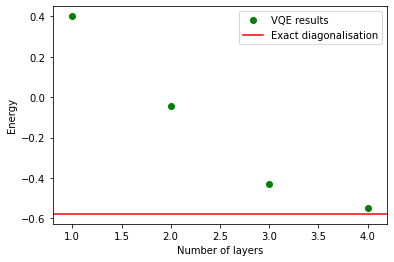

In [46]:
plt.plot(np.array([1.,2.,3.,4.]),np.array([energy_after_one_layer,energy_after_two_layers,energy_after_three_layers,energy_after_four_layers]), 'o', color = "green",label="VQE results")
plt.plot(np.array([0.,2.,3.,4.5]), np.array([eigenval[0],eigenval[0],eigenval[0],eigenval[0]]),color = "red",label="Exact diagonalisation")
plt.xlim(0.8,4.2)
plt.xlabel("Number of layers")
plt.ylabel("Energy")
plt.legend()